In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [7]:
dataframe = pd.read_csv('dataframe_PCA.csv')
X = dataframe.drop(columns=['Label', 'Patient index'])
y = dataframe['Label']

test_size = 0.1
random_state = 21

print(f"Test size: {test_size}, Random state: {random_state}")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# 设置网格搜索参数
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# 网格搜索
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='f1_weighted', n_jobs=4, verbose=2)
grid_search.fit(X_train, y_train)

# 使用最佳参数训练模型
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

# 评估模型
y_pred = best_rf_clf.predict(X_test)

Test size: 0.1, Random state: 21
Fitting 5 folds for each of 144 candidates, totalling 720 fits


Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       295
           1       0.65      0.59      0.62       238

    accuracy                           0.68       533
   macro avg       0.67      0.67      0.67       533
weighted avg       0.68      0.68      0.68       533



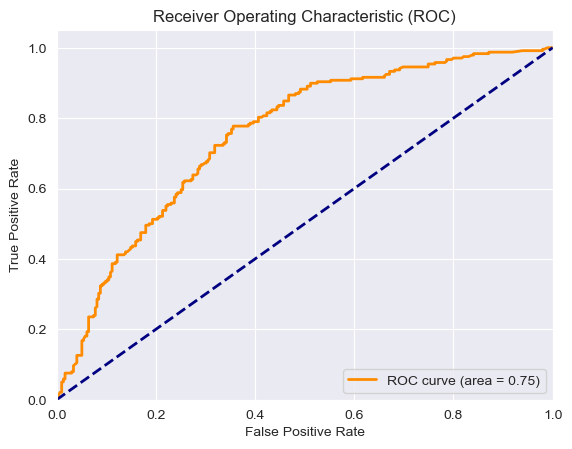

In [8]:
# 输出结果
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred))

# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, best_rf_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



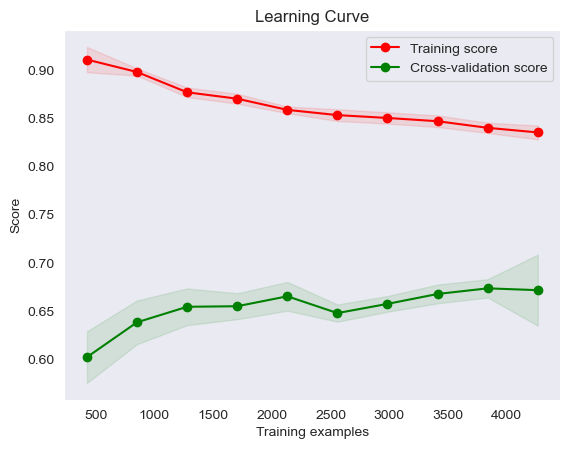

In [9]:
# 绘制学习曲线
train_sizes, train_scores, test_scores = learning_curve(best_rf_clf, X, y, cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()
